---
# Ejercicio 8
**a)** Sean U y V dos variables aleatorias uniformes en $(0,1)$ e independientes. Pruebe que la variable $X = U + V$ tiene una *densidad triangular*:

$$
f(x) =
\begin{cases}
x    \quad \text{ si } 0 \leq x < 1 \\
2-x  \quad \text{ si } 1 \leq x < 2 \\
0    \quad \text{ si } cc
\end{cases}
$$

In [1]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

Fuente: 🌎 [Wikipedia](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_triangular)

Decimos que una variable aleatoria tiene *densidad triangular* si:
- tiene un valor mínimo a
- un valor máximo b
- una moda c 

De modo que la función de densidad de probabilidad es cero para los extremos (a y b), y afín entre cada extremo y la moda, por lo que su gráfico es un triángulo.

En este caso el *valor mínimo* es 0, el *valor máximo es* 1 y la *moda* es 1 

In [2]:
def f(x:float) -> float:
    """
    Función de densidad del ejercicio

    Args:
        x (float): parámetro de entrada

    Returns:
        float: densidad de x
    """
    return np.where(
        (0 <= x) & (x < 1),
        x,
        np.where(
            (1 <= x) & (x < 2),
            2-x,
            0   
        )
    )

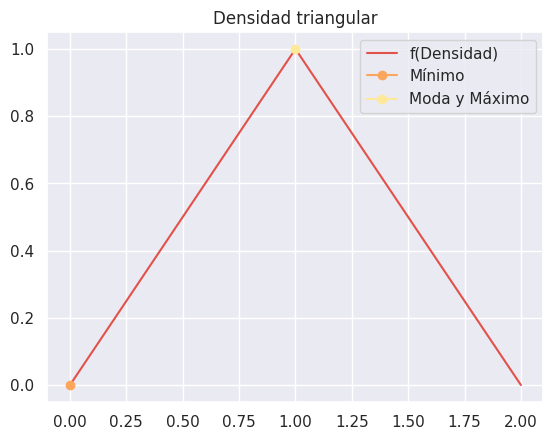

In [8]:
x = np.linspace(0,2, 1000)
fashion = (1,1)
m = (0,0)

sns.set_palette("Spectral")
sns.lineplot(x=x, y=f(x=x), label="f(Densidad)")
plt.plot(m[0], m[1], marker='o', label="Mínimo")
plt.plot(fashion[0], fashion[1], marker='o', label="Moda y Máximo")
plt.title("Densidad triangular")
plt.legend()
plt.show()

---
**b)**  Desarrolle tres algoritmos que simulen la variable X:
- i. Usando la propiedad que X es suma de dos uniformes independientes.
- ii) Aplicando transformada inversa.
- iii) Con el método de rechazo.

# Distribución acumulada
Para la generación de las variables aleatorias de los métodos debo simular la acumulada, por ello:

- Resultado teórico: $F'(x) = f(x)$
- Como tengo $f(x)$, debo sacar la antiderivada y obtengo $F$

## Antiderivada:
- **Si $x<0$:**
$$
    \int_{-\infty}^x f(t)dt = 0
$$

- **Si $0 \leq x$:**
$$
    \int_{-\infty}^x f(t)dt = \int_{0}^x f(t)dt = \int_{0}^x tdt = \frac{1}{2} \cdot t^2\bigg|_0^x = \boxed{\frac{1}{2}\cdot x^2}
$$

- **Si $1 \leq x$:**
$$
\begin{align*}
    \int_{-\infty}^x f(t)dt &= \int_{0}^1 f(t)dt + \int_{1}^x f(t)dt = \frac{1}{2} + \int_{1}^x 2 - t \quad dt = \frac{1}{2} + 2 \cdot \int_{1}^x 1 dt - \int_{1}^x tdt \\[0.4cm]
  &= \frac{1}{2} + 2 t\bigg|_1^x - \frac{1}{2}\cdot t^2 \bigg|_1^x = \frac{1}{2} + 2(x-1) - \frac{1}{2} \cdot (x²-1) = \boxed{-\frac{1}{2}x^2 + 2x - 1}
 \end{align*}
$$

- **Si $2 \leq x$:**
$$
\begin{align*}
    \int_{-\infty}^x f(t)dt &= \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt + \int_{2}^x f(t)dt = \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt + 0 = \int_{0}^1 f(t)dt + \int_{1}^2 f(t)dt \\[0.4cm]
    &= \int_{0}^1 t dt + \int_{1}^2 2-t dt = \frac{1}{2} \cdot t \bigg|_0^1 +  2 t\bigg|_1^2 - \frac{1}{2}\cdot t^2 \bigg|_1^2 = \frac{1}{2} + 2 - \frac{1}{2} \cdot (2^2 - 1^2) = \frac{1}{2} + 2 - \frac{1}{2} \cdot 3 = \boxed{1}
\end{align*}
$$


Finalmente obtenemos $F$:
$$
F(x) =
\begin{cases}
0                           & \text{si } x < 0 \\[0.3cm]
\frac{1}{2} \cdot x^2       & \text{si } 0 \leq x < 1 \\[0.3cm]
-\frac{1}{2}x^2 + 2x - 1    & \text{si } 1 \leq x < 2 \\[0.3cm]
1                           & \text{si } 2 \leq x
\end{cases}
$$


# Suma de dos uniformes


Simple:
$$
X = U + Y
$$

Donde $U,Y \thicksim \mathbb{U}(0,1)$

In [5]:
def two_uniforms() -> float:
    """
    Variable aleatoria, suma de dos uniformes

    Returns:
        float: valor aleatorio
    """
    return random() + random()

# Transformada inversa

Para este caso tenemos que el método de la transformada inversa:
$$
U = F^{-1}(x), \quad \text{para donde esté definida F}
$$

Por ende:
- **Si $0 \leq x < 1$**:
$$
\begin{align*}
    U &= \frac{1}{2} \cdot x²\\[0.4cm]
  \sqrt{2U}  &= x 
\end{align*}
$$

- Punto de quiebre:
$$
F(1) = -\frac{1}{2}\cdot 1 + 2\cdot 1 - 1 = -\frac{1}{2} + 1 = \frac{1}{2}
$$

- **Si $1 \leq x < 2$**
$$
\begin{align*}
   U &= -\frac{1}{2}x^2 + 2x - 1\\[0.4cm]
   0 &=  -\frac{1}{2}x^2 + 2x + (- 1 - U)\\[0.4cm]
\end{align*}
$$

Luego de calcular Baskhara:
$$
x_1 = 2 +\sqrt{2-2U}\\[0.4cm]
x_2 = 2 -\sqrt{2-2U}
$$

Como $x \in [1,2)$ debemos ver qué valor de x debe tomar U.

Para ello evaluamos U en los extremos, i.e en 0 y 1:

- **Si $U=0$:**
$$
x_1 = 2 +\sqrt{2-2*0} \\[0.3cm]
x_1 = 2 + \sqrt{2}
x_1 \approx 3.414
$$

**No podemos utilizar $x_1$, evidentemente.**

- **Si $U=0$:**
$$
x_2 = 2 -\sqrt{2-2\cdot 0} \\[0.3cm]
x_2 = 2 - \sqrt{2}\\[0.3cm]
x_2 \approx 0.586
$$

**Si $U=1$:**
$$
x_2 = 2 -\sqrt{2-2\cdot 1} \\[0.3cm]
x_2 = 2 - \sqrt{2}\\[0.3cm]
x_2 = 2
$$

**Border pero vale.**

Se utiliza $U = 2 - \sqrt{2-2\cdot U}$

In [6]:
def TIX() -> float:
    """
    Generación de variable aleatoria
    Por el método de la transformada inversa

    Returns:
        float: Valor aleatorio
    """
    U = random()
    if U < 0.5:
        return (2*U) ** 0.5
    else:
        return 2 - ((2 - 2*U) ** 0.5)

# Método de rechazo

Ahora toca el método de rechazo, por ende necesitamos:
- $f(x)$
- $g(x)$
- $c$
tal que:
$$
\frac{f(x)}{g(x)} \leq c
$$

**Por ejercicio:** $f(x)$ la tenemos, definida en distintos puntos.

*Por otro lado:* Sea $g(x)=1$ tal que podemos generar a $g$ con una variable aleatoria U con distro. uniforme tal que $U \sim \mathbb{U}(0,1)$.

Sea $h(x)$ tal que: $h(x) = \frac{f(x)}{g(x)} = f(x)$. Notar que la definición de $h(x)$ depende de la definición de $f(x)$.

Como analizamos que la densidad es *triangular*, es evidente que tiene máximo, en este caso el máximo se encuentra en $x = 1$, luego:

$$
f(1) = 2 - 1 = 1
$$

Luego evidentemente es $c = 1$

Luego el algoritmo resulta:

In [9]:
def uniform(a:float, b:float) -> float:
    """
    Variable aleatoria con distro. uniforme en el (a,b)

    Args:
        a (float): Lim. inferior
        b (float): Lim. superior

    Returns:
        float: valor aleatorio entre (a, b)
    """
    return random() * (b - a) + a


def MR() -> float:
    """
    Generación de variable aleatoria
    Por el método de rechazo

    Returns:
        float: Valor aleatorio
    """
    while True:
        Y = uniform(a=0, b=2) # Simulo f
        f_y = f(x=Y)
        U = random()
        if U < f_y:
            return Y

--- 
# Comparativas

In [70]:
def efitienty_methods(methods:list[Callable[[int],float]] ,Nsim=int) -> dict:
    results = {}
    
    #Simulaciones
    for method in methods:
        init_time = time()
        method_name =  method.__name__
        samples = []

        for _ in range(Nsim):
            sample = method()
            samples.append(sample)
        
        elapsed_time = time() - init_time 
        mean = sum(samples) / Nsim
        results[method_name] = {
            "mean": mean,
            "samples": samples,
            "time": elapsed_time
        }
    
    return results

---
## Comparativa Gráfica

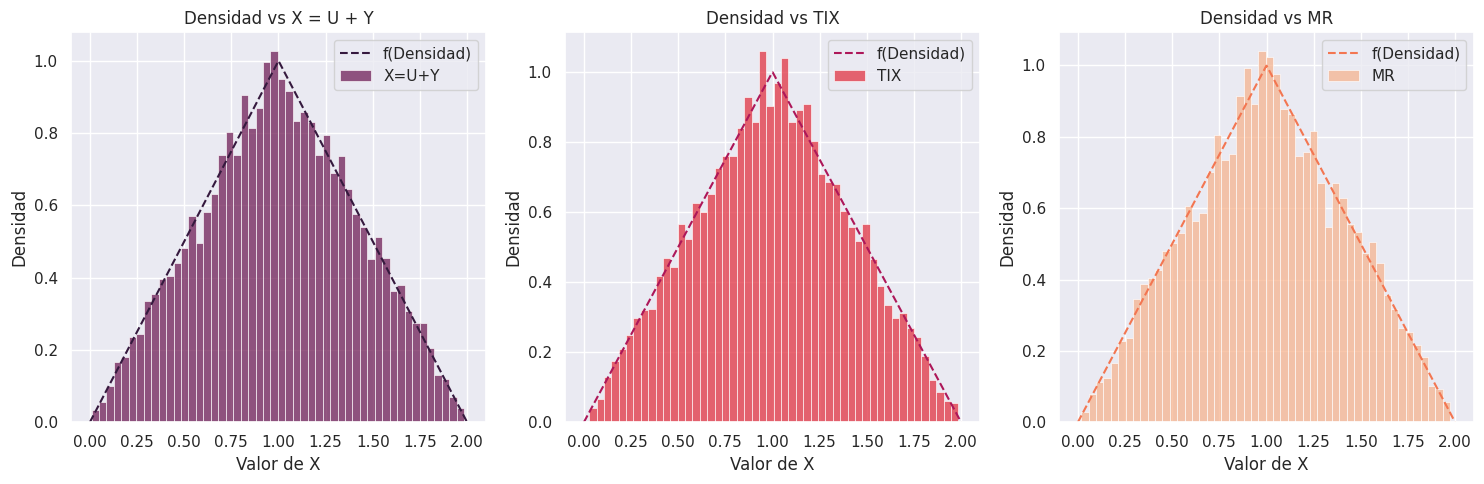

In [67]:
Nsim = 10_000  

x = np.linspace(0, 2, 1000)

#X = U+Y
X_sim = [two_uniforms() for _ in range(Nsim)]

#Transformada inversa
TIX_sim = [TIX() for _ in range(Nsim)]

#Método de rechazo
MR_sim = [MR() for _ in range(Nsim)]

pallete = sns.color_palette("rocket")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(x=x, y=f(x), label="f(Densidad)", linestyle='--', ax=axes[0], color=pallete[0])
sns.histplot(X_sim, bins=50, stat='density', label="X=U+Y", ax=axes[0], color=pallete[1])
axes[0].set_title("Densidad vs X = U + Y")
axes[0].legend()
axes[0].set_xlabel("Valor de X")
axes[0].set_ylabel("Densidad")

sns.lineplot(x=x, y=f(x), label="f(Densidad)", linestyle='--', ax=axes[1], color=pallete[2])
sns.histplot(TIX_sim, bins=50, stat='density', label="TIX", ax=axes[1], color=pallete[3])
axes[1].set_title("Densidad vs TIX")
axes[1].legend()
axes[1].set_xlabel("Valor de X")
axes[1].set_ylabel("Densidad")

sns.lineplot(x=x, y=f(x), label="f(Densidad)", linestyle='--', ax=axes[2], color=pallete[4])
sns.histplot(MR_sim, bins=50, stat='density', label="MR", ax=axes[2], color=pallete[5])
axes[2].set_title("Densidad vs MR")
axes[2].legend()
axes[2].set_xlabel("Valor de X")
axes[2].set_ylabel("Densidad")

plt.tight_layout()
plt.show()


---
## Comparativa numérica: Valor esperado

Debo hallar el valor esperado de $f(x)$

En este caso tenemos que por resultados teóricos:
$$
E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \quad dx
$$

Entonces resolvemos:
$$
\begin{align*}
    E[X] &= \int_{-\infty}^{\infty} x \cdot f(x) \quad dx = \int_{0}^{1} x \cdot x \quad dx +  \int_{1}^{2} x \cdot (2-x) \quad dx \\[0.4cm]
         &= \int_{0}^{1} x² \quad dx + \int_{1}^{2} 2x \quad dx - \int_{1}^{2} x^2 \quad dx = \frac{1}{3} \cdot x³ \bigg|_0^1 +x^2\bigg|_1^2 - \frac{1}{3}\cdot x^3 \bigg|_1^2 \\[0.4cm]
         &= \frac{1}{3} + 3 - \frac{1}{3} \cdot 7 = \boxed{1}
\end{align*}
$$

In [73]:
Nsim = 10_000

methods = [MR, TIX]
results: dict = efitienty_methods(
    methods=methods,
    Nsim=Nsim
)

mean = 1

print("\nCOMPARACIÓN DEL TIEMPO")
print("----------- --- ------")

print(f"(MR) ⌛ -> {results["MR"]["time"]:4f} seg")
print(f"(TIX)⌛ -> {results["TIX"]["time"]:4f} seg")

print("\nCOMPARACIÓN DEL NÚMERO PROMEDIO DE VALORES")
print("----------- --- ------ -------- -- -------")
print(f"(MR)  🍪 -> {results["MR"]["mean"]:4f}")
print(f"(TIX) 🍪 -> {results["TIX"]["mean"]:4f}")
print(f"(E[X])🍪 -> {mean:4f}")


COMPARACIÓN DEL TIEMPO
----------- --- ------
(MR) ⌛ -> 0.130187 seg
(TIX)⌛ -> 0.002156 seg

COMPARACIÓN DEL NÚMERO PROMEDIO DE VALORES
----------- --- ------ -------- -- -------
(MR)  🍪 -> 0.999751
(TIX) 🍪 -> 1.007712
(E[X])🍪 -> 1.000000


Se pide ver *para qué valor $x_0$ se cumple que $P(X>x_0)=0.125$*

Tenemos que $P(X>x_0) = 1 - P(X\leq x_0)$ donde $P(X\leq x)=F(x)$ para algún x

Ahora tenemos 3 casos:

- **CASO[$x_0 \notin [0,1) \wedge x_0 \notin [1,2)$]:No vale** 
$$
\begin{align*}
    P(X\leq x_0) &= F(x) \\[0.4cm]
    P(X\leq x_0) &= 0
\end{align*}
$$


- **CASO[$x_0 \in [0,1)$]:**
$$
\begin{align*}
    P(X\leq x_0) &= F(x) \\[0.4cm]
    P(X\leq x_0) &= \frac{1}{2} \cdot x_0^2 \\[0.4cm]
\end{align*}
$$

En este caso:
$$
\begin{align*}
    1 - P(X\leq x_0) &= 0.125 \\[0.4cm]
    1 -\frac{1}{2} \cdot x_0^2  &= 0.125\\[0.4cm]
    x_0 &=  \sqrt{\frac{1 - 0.125}{\frac{1}{2}}}\\[0.4cm]
    \boxed{x_0 \approx 1.32}
\end{align*}
$$

*Absurdo*. Pues dijimos $x_0 \in [0,1)$

- **CASO[$x_0 \in [1,2)$]:**
$$
\begin{align*}
        P(X\leq x_0) &= F(x) \\[0.4cm]
        P(X\leq x_0) &= -\frac{1}{2} \cdot x_0^2 + 2\cdot x_0 - 1
\end{align*}
$$

En este caso:
$$
\begin{align*}
    1 - P(X\leq x_0) &= 0.125 \\[0.4cm]
    (-1) \cdot - (-\frac{1}{2} \cdot x_0^2 + 2\cdot x_0 - 1)  &= (-1)\cdot(0.125 - 1)\\[0.4cm]
    - \frac{1}{2} \cdot x_0^2 + 2\cdot x_0  - 1 &= 0.875\\[0.4cm]
    - \frac{1}{2} \cdot x_0^2 + 2\cdot x_0 - 1.875 &= 0
\end{align*}
$$

Luego de aplicar Baskhara obtenemos que:
$$
\boxed{x_{0_1} = 1.5 } \wedge \boxed{x_{0_2} = 2.5}
$$

Como $x_0 \in [1,2)$, tomo $\boxed{x_{0_1}=1.5}$


Luego verificamos:

$$
\begin{align*}
    F(1.5) = -\frac{1}{2} \cdot 1.5^2 + 2\cdot 1.5 - 1 = 0.875
\end{align*}
$$

Como se quiere $P(X > x_0) = 0.125$ y teníamos que $P(X > x_0) = 1 - P(X \leq x_0) = 1 - F(x_0) = 0.125$

con $x_0=1.5 \Longrightarrow 1-0.875 = 0.125$